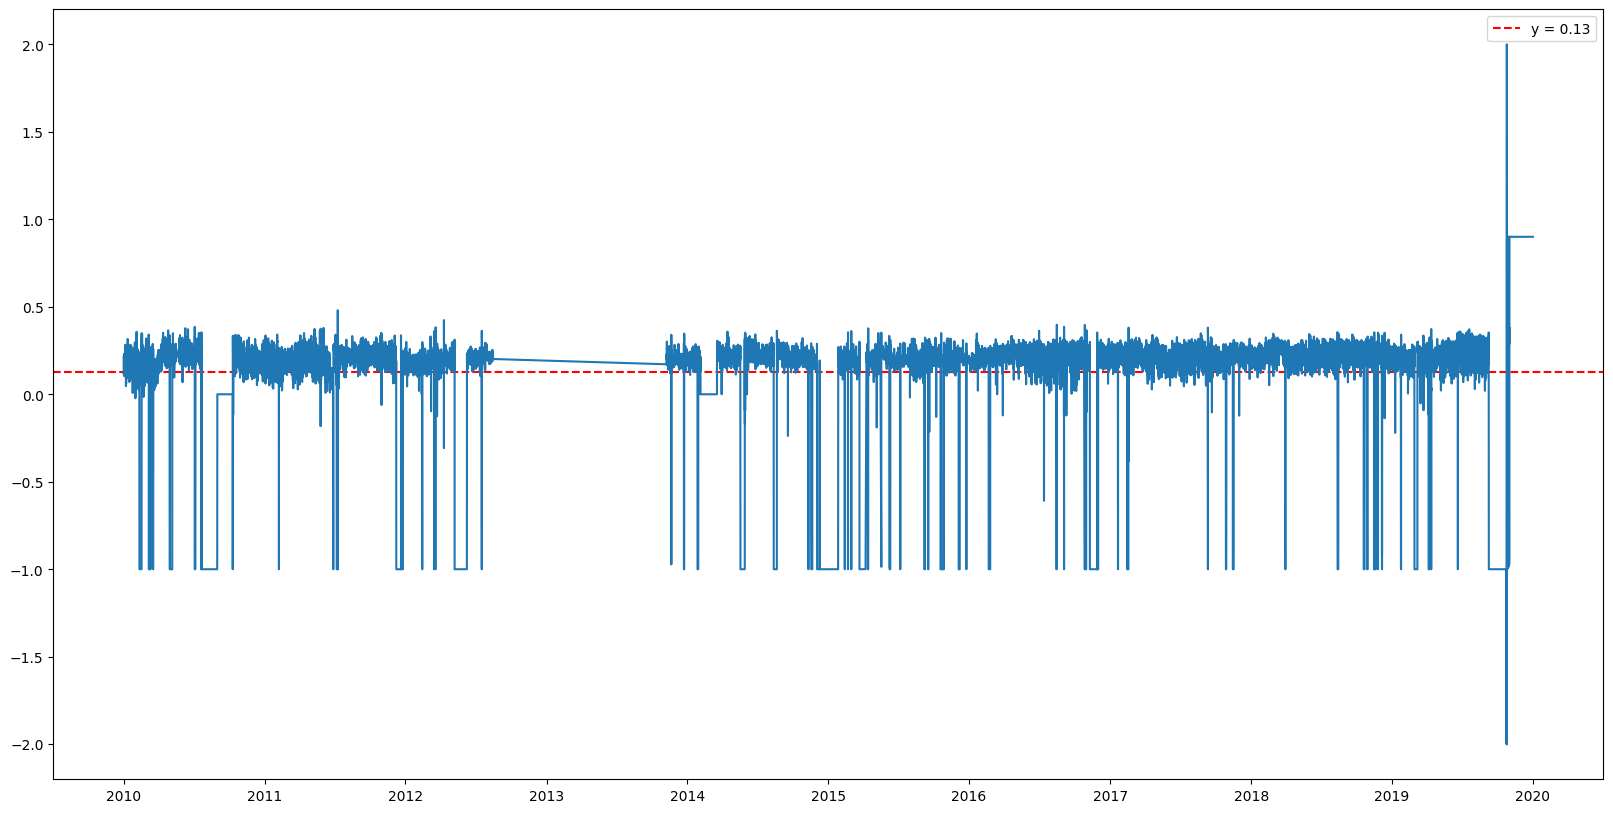

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
#%matplotlib widget

date_time = survival["date__time"]
lp_dev_2010_ = survival["lp_deviation"]

fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the values (width, height) as needed
plt.axhline(y=0.13, color='red', linestyle='--', label='y = 0.13')

# Create a line plot of the "lp_deviation" values against "date__time"
ax.plot(date_time, lp_dev_2010_)
plt.legend()
plt.show()


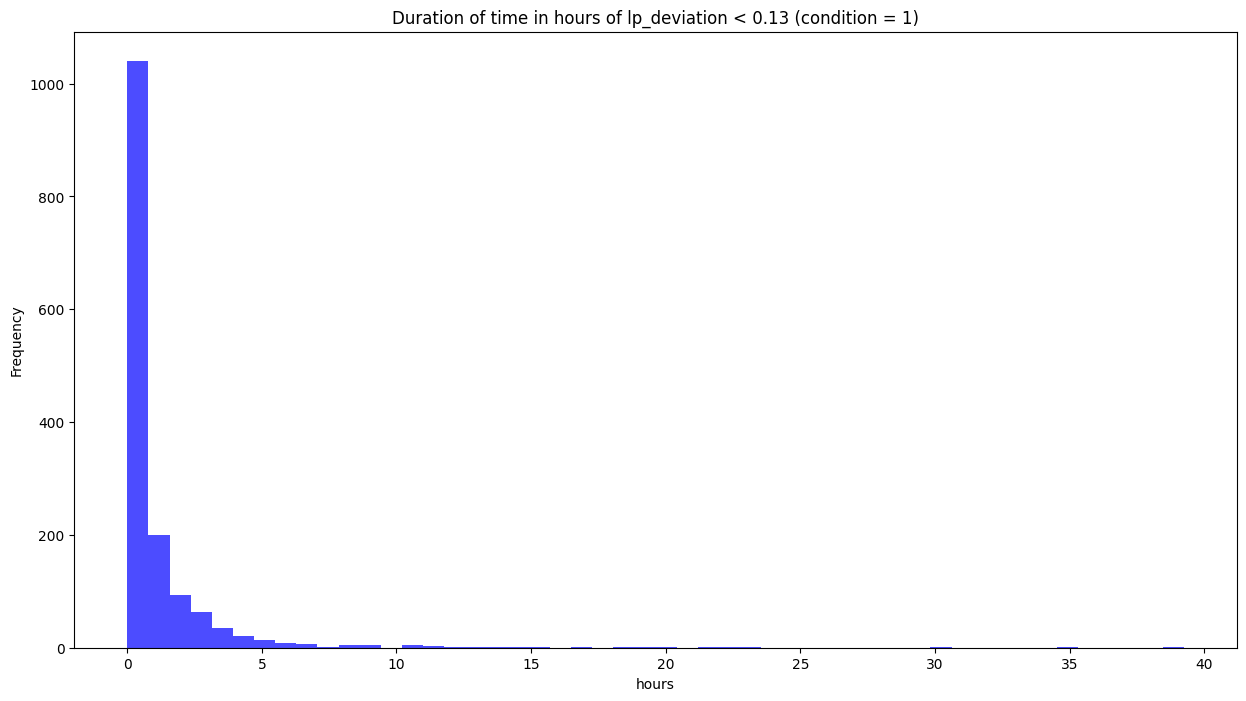

In [ ]:
%matplotlib inline

lp_dev_below_threshold_minutes = lp_dev_below_threshold["duration_minutes"]
lp_dev_below_threshold_hours = lp_dev_below_threshold["duration_hours"]
lp_dev_below_threshold_day = lp_dev_below_threshold["duration_days"]

plt.figure(figsize=(15, 8))

plt.hist(lp_dev_below_threshold_hours, bins = 50, color = 'blue', alpha = 0.7)  # 'bins' controls the number of bins or bars in the histogram
plt.xlabel('hours')
plt.ylabel('Frequency')
plt.title('Duration of time in hours of lp_deviation < 0.13 (condition = 1)')

# Show the histogram
plt.show()

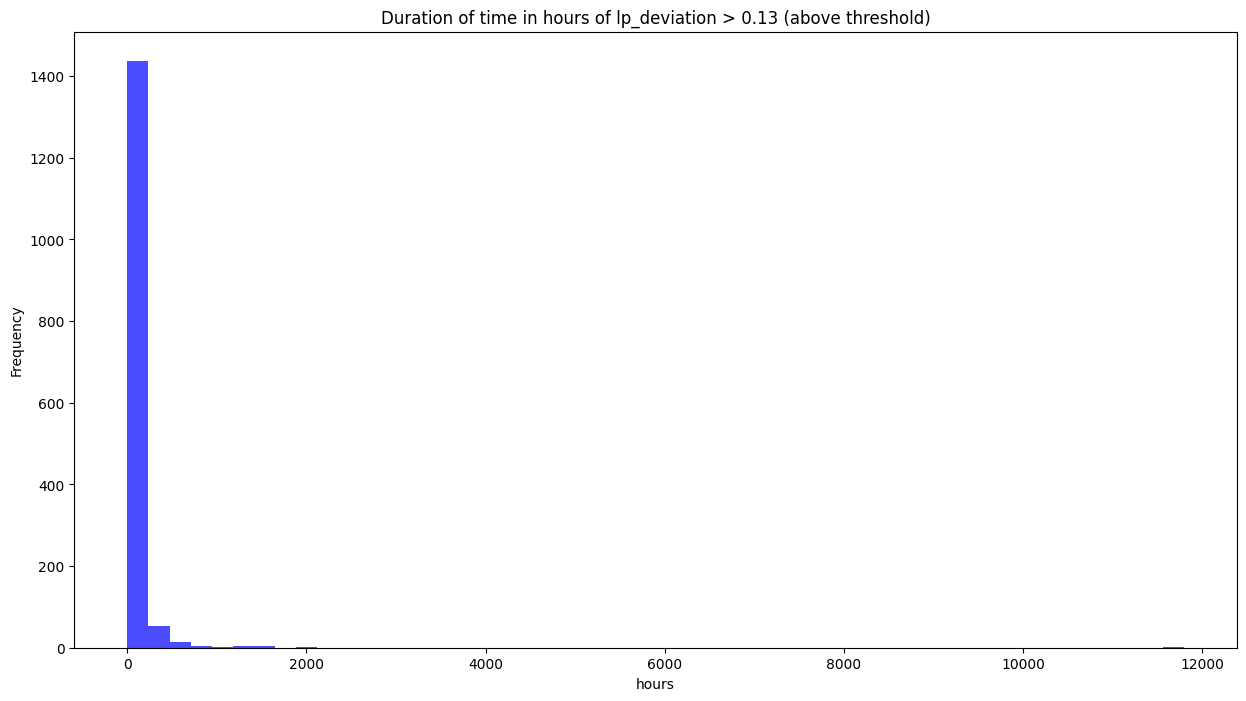

In [ ]:
%matplotlib inline

lp_dev_above_threshold_minutes = lp_dev_above_threshold["duration_minutes"]
lp_dev_above_threshold_hours = lp_dev_above_threshold["duration_hours"]
lp_dev_above_threshold_day = lp_dev_above_threshold["duration_days"]

plt.figure(figsize=(15, 8))

plt.hist(lp_dev_above_threshold_hours, bins = 50, color = 'blue', alpha = 0.7)  # 'bins' controls the number of bins or bars in the histogram
plt.xlabel('hours')
plt.ylabel('Frequency')
plt.title('Duration of time in hours of lp_deviation > 0.13 (above threshold)')

# Show the histogram
plt.show()

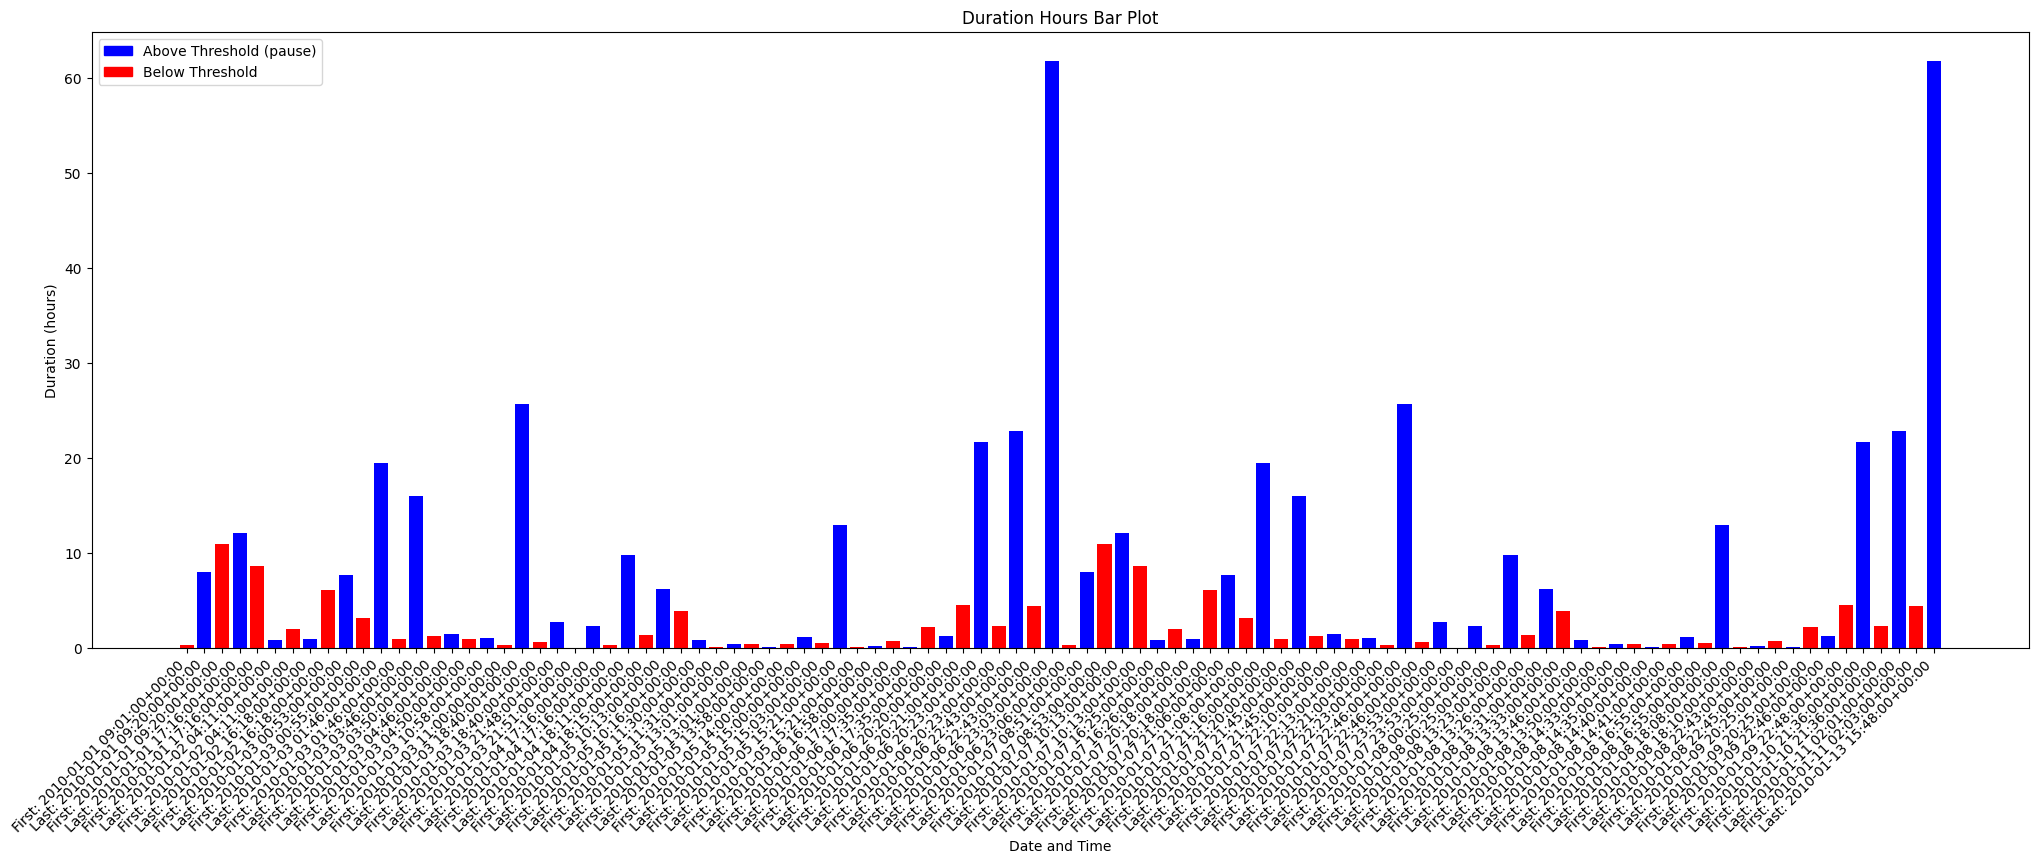

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_duration_hours_barplot(up_down_time_stats_1_df, start_row=0, end_row=None):
    if end_row is None:
        end_row = len(up_down_time_stats_1_df)

    duration_hours_first = []  # To store duration_hours for 'first'
    duration_hours_last = []   # To store duration_hours for 'last'
    x_labels = []              # To store formatted date and time labels
    bar_colors = []            # To store colors for the bars

    for index, row in up_down_time_stats_1_df.iloc[start_row:end_row].iterrows():
        first = row['first']
        last = row['last']
        duration_first = row['duration_hours']
        duration_last = row['duration_hours']

        # Append the duration and labels for 'first' and 'last'
        duration_hours_first.append(duration_first)
        duration_hours_last.append(duration_last)
        x_labels.extend([f'First: {first}', f'Last: {last}'])
        bar_colors.extend(['red', 'blue'])

    fig, ax = plt.subplots(figsize = (25, 8))

    # Creating the bar plot with specified colors for 'first' and 'last'
    ax.bar(x_labels, duration_hours_first + duration_hours_last, color=bar_colors)

    # Adding labels and title
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Duration (hours)')
    ax.set_title('Duration Hours Bar Plot')

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Create custom legend
    legend_elements = [
        Patch(color='blue', label='Above Threshold (pause)'),
        Patch(color='red', label='Below Threshold')
    ]
    ax.legend(handles=legend_elements)

    plt.show()

# Call the function with your DataFrame
plot_duration_hours_barplot(up_down_time_stats_without_shutdown, start_row = 0, end_row = 50)


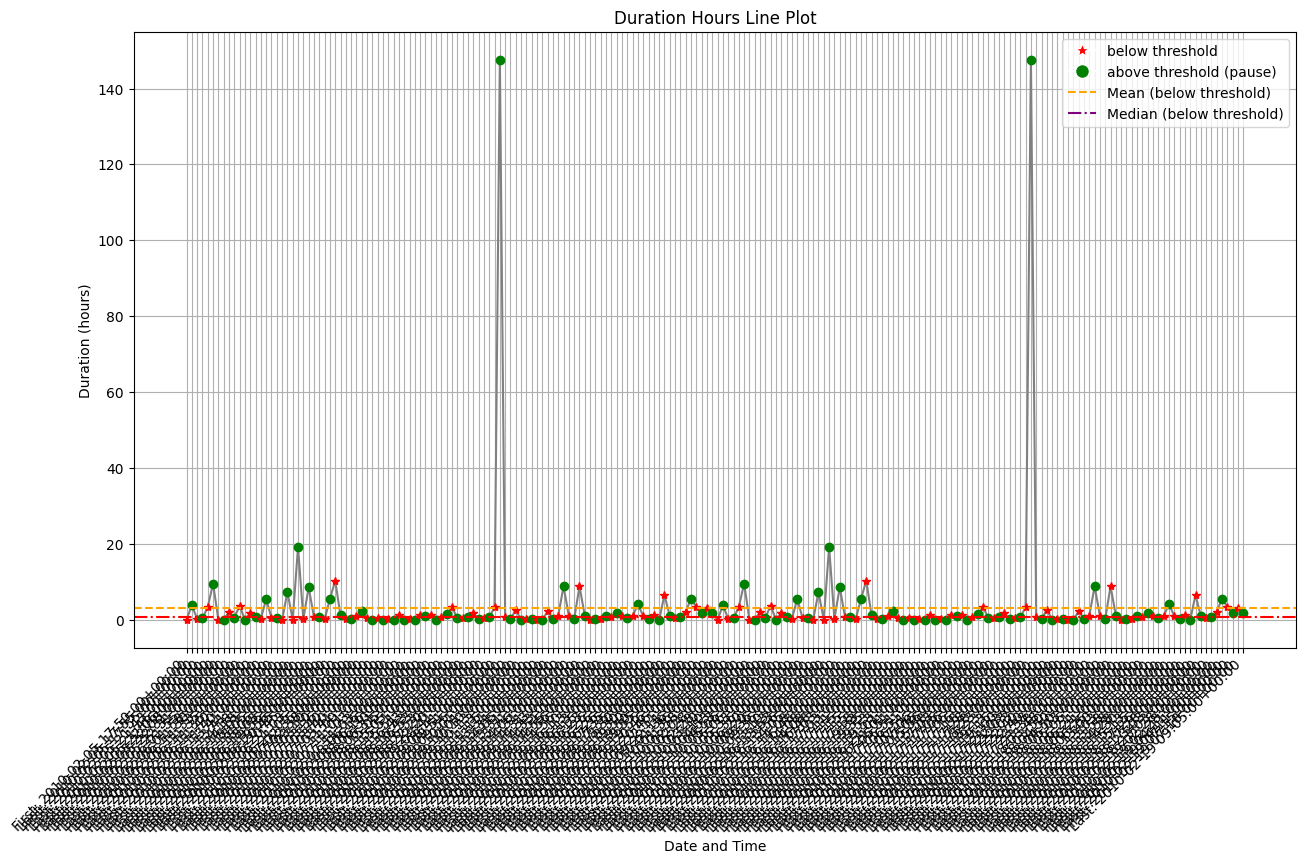

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def plot_duration_hours_lineplot(up_down_time_stats_1_df, start_row=0, end_row=None):
    if end_row is None:
        end_row = len(up_down_time_stats_1_df)

    duration_hours_first = []  # To store duration_hours for 'first'
    duration_hours_last = []   # To store duration_hours for 'last'
    x_labels = []              # To store formatted date and time labels
    markers = []               # To store markers for 'first' and 'last'

    for index, row in up_down_time_stats_1_df.iloc[start_row:end_row].iterrows():
        first = row['first']
        last = row['last']
        duration_first = row['duration_hours']
        duration_last = row['duration_hours']

        # Append the duration and labels for 'first' and 'last'
        duration_hours_first.append(duration_first)
        duration_hours_last.append(duration_last)
        x_labels.extend([f'First: {first}', f'Last: {last}'])
        markers.extend(['*', 'o'])

    fig, ax = plt.subplots(figsize=(15, 8))

    # Convert your x_labels into a series of numeric indices
    x_indices = range(len(duration_hours_first + duration_hours_last))
    combined_durations = duration_hours_first + duration_hours_last

    # Plot the durations with a connecting line
    ax.plot(x_indices, combined_durations, color='grey', linestyle='-', label='Connecting Line')

    # Plot markers on top of the connecting line
    for i, (duration, marker) in enumerate(zip(combined_durations, markers)):
        color = 'red' if marker == '*' else 'green'  # Choose color based on marker
        ax.plot(i, duration, marker=marker, markersize=6, color=color)

    # Replace numeric indices with the original x-labels
    ax.set_xticks(x_indices)
    ax.set_xticklabels(x_labels, rotation=45, ha='right')

    # Adding labels and title
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Duration (hours)')
    ax.set_title('Duration Hours Line Plot')
        # Calculate mean and median of durations corresponding to stars
    mean_duration_first = sum(duration_hours_first) / len(duration_hours_first)
    median_duration_first = sorted(duration_hours_first)[len(duration_hours_first) // 2]

    # ... [rest of your plotting code]


    # Create custom legend
    legend_elements = [
    Line2D([], [], marker='*', color='w', markerfacecolor='red', markersize=10, label='below threshold'),
    Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='above threshold (pause)'),
    Line2D([], [], color='orange', linestyle='--', label='Mean (below threshold)'),
    Line2D([], [], color='purple', linestyle='-.', label='Median (below threshold)')
]
     # Plot mean and median as horizontal lines
    ax.axhline(mean_duration_first, color='orange', linestyle='--', label='Mean (below threshold)')
    ax.axhline(median_duration_first, color='red', linestyle='-.', label='Median (below threshold)')

    ax.legend(handles=legend_elements)

    plt.grid(True)  # Add grid lines

    plt.show()

# Call the function with your DataFrame
plot_duration_hours_lineplot(up_down_time_stats_without_shutdown, start_row = 200, end_row = 300)


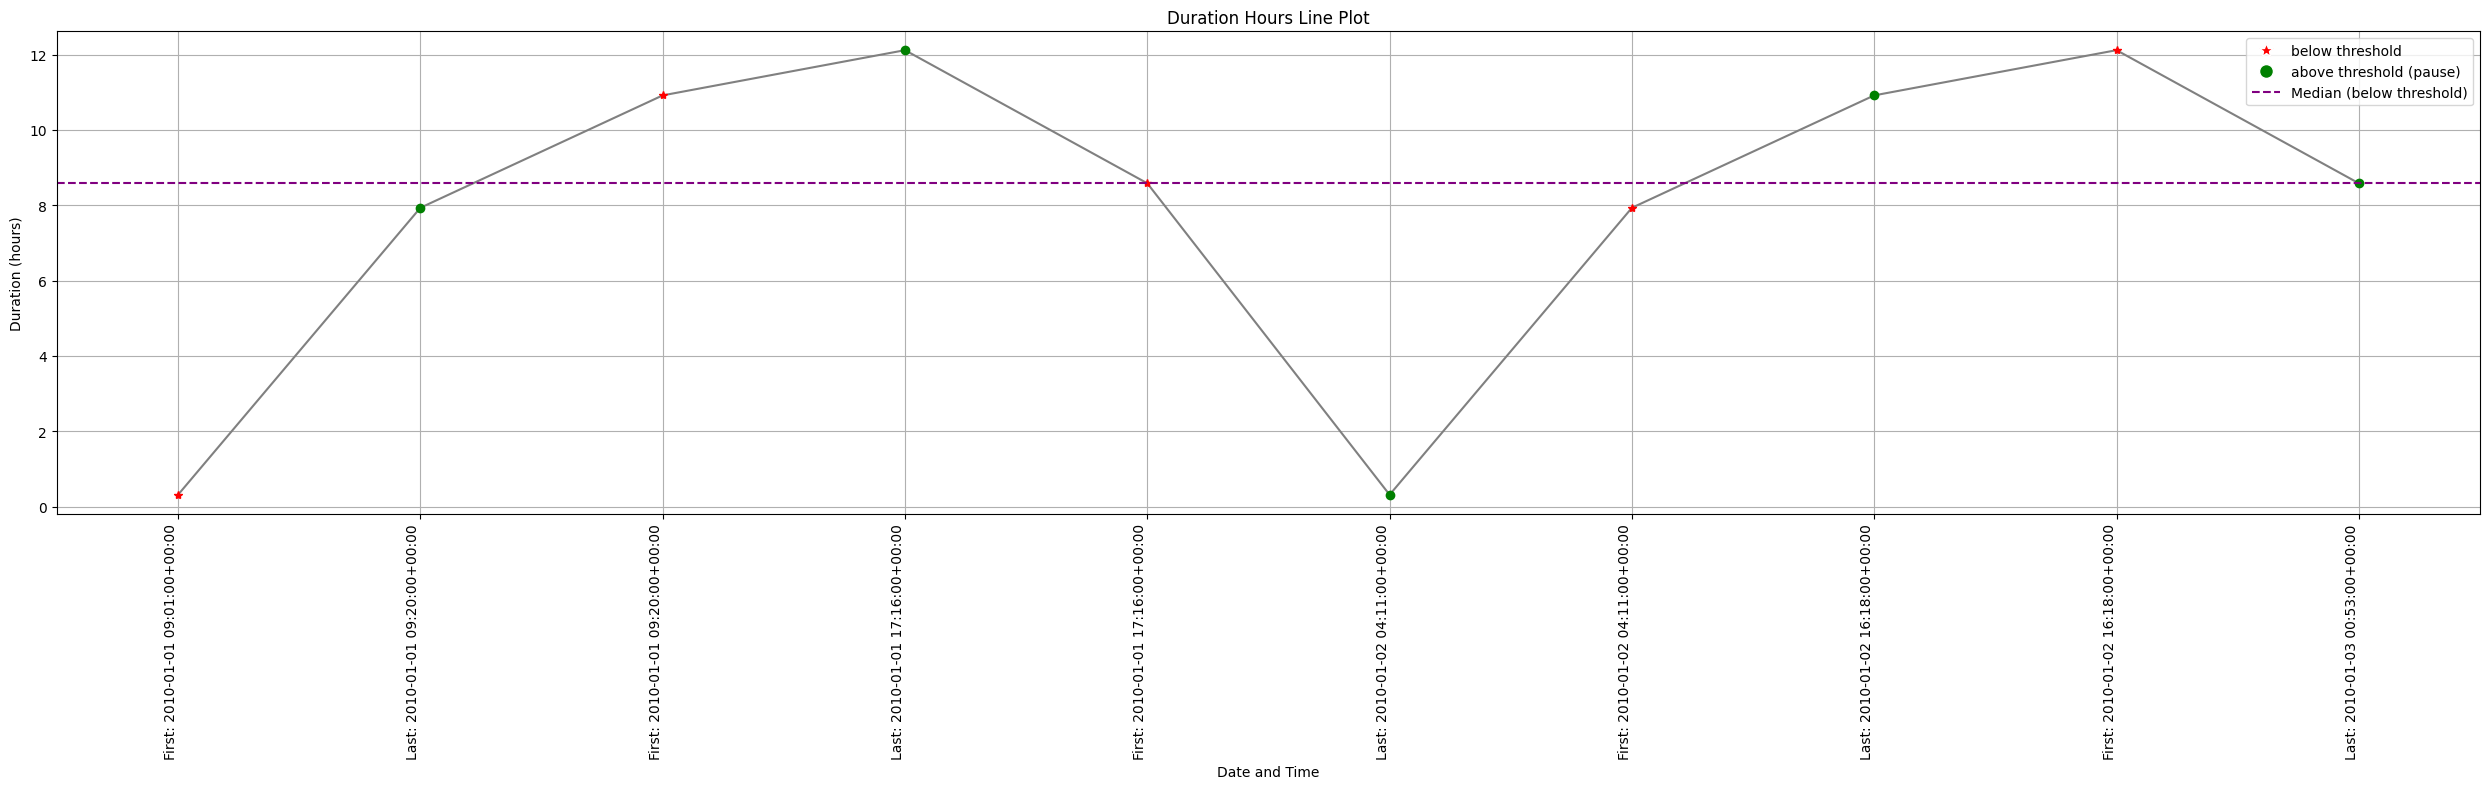

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np  # for np.median()

def plot_duration_hours_lineplot_styled(up_down_time_stats_1_df, start_row=0, end_row=None):
    if end_row is None:
        end_row = len(up_down_time_stats_1_df)

    duration_hours_first = []  # To store duration_hours for 'first'
    duration_hours_last = []   # To store duration_hours for 'last'
    x_labels = []              # To store formatted date and time labels
    markers = []               # To store markers for 'first' and 'last'

    for index, row in up_down_time_stats_1_df.iloc[start_row:end_row].iterrows():
        first = row['first']
        last = row['last']
        duration_first = row['duration_hours']
        duration_last = row['duration_hours']

        # Append the duration and labels for 'first' and 'last'
        duration_hours_first.append(duration_first)
        duration_hours_last.append(duration_last)
        x_labels.extend([f'First: {first}', f'Last: {last}'])
        markers.extend(['*', 'o'])

    combined_durations = duration_hours_first + duration_hours_last

    # Extract all 'below threshold' values using combined_durations and markers
    below_threshold_durations = [dur for dur, mark in zip(combined_durations, markers) if mark == '*']

    # Calculate median of all 'below threshold' values
    median_below_threshold = np.median(below_threshold_durations)

    fig, ax = plt.subplots(figsize=(25, 8))

    # Convert x_labels into a series of numeric indices
    x_indices = range(len(duration_hours_first + duration_hours_last))

    # Plot the durations with a connecting line
    ax.plot(x_indices, combined_durations, color='grey', linestyle='-', label='Connecting Line')

    # Plot markers on top of the connecting line
    for i, (duration, marker) in enumerate(zip(combined_durations, markers)):
        color = 'red' if marker == '*' else 'green'
        ax.plot(i, duration, marker=marker, markersize=6, color=color)

    # Replace numeric indices with the original x-labels
    ax.set_xticks(x_indices)
    ax.set_xticklabels(x_labels, rotation=90, ha='right')

    # Adding labels and title
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Duration (hours)')
    ax.set_title('Duration Hours Line Plot')

    # Plot the constant median line
    ax.axhline(median_below_threshold, color='purple', linestyle='--', label=f'Median (below threshold): {median_below_threshold:.2f}')

    # Create custom legend
    legend_elements = [
        Line2D([], [], marker='*', color='w', markerfacecolor='red', markersize=10, label='below threshold'),
        Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='above threshold (pause)'),
        Line2D([], [], color='purple', linestyle='--', label=f'Median (below threshold)')
    ]
    ax.legend(handles=legend_elements)

    # Adjust the space to fill most of the figure area
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)
    ax.set_xlim(min(x_indices) - 0.5, max(x_indices) + 0.5)
    ax.set_ylim(min(combined_durations) - 0.5, max(combined_durations) + 0.5)

    plt.grid(True)  # Add grid lines
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_duration_hours_lineplot_styled(up_down_time_stats_without_shutdown, start_row=0, end_row=5)


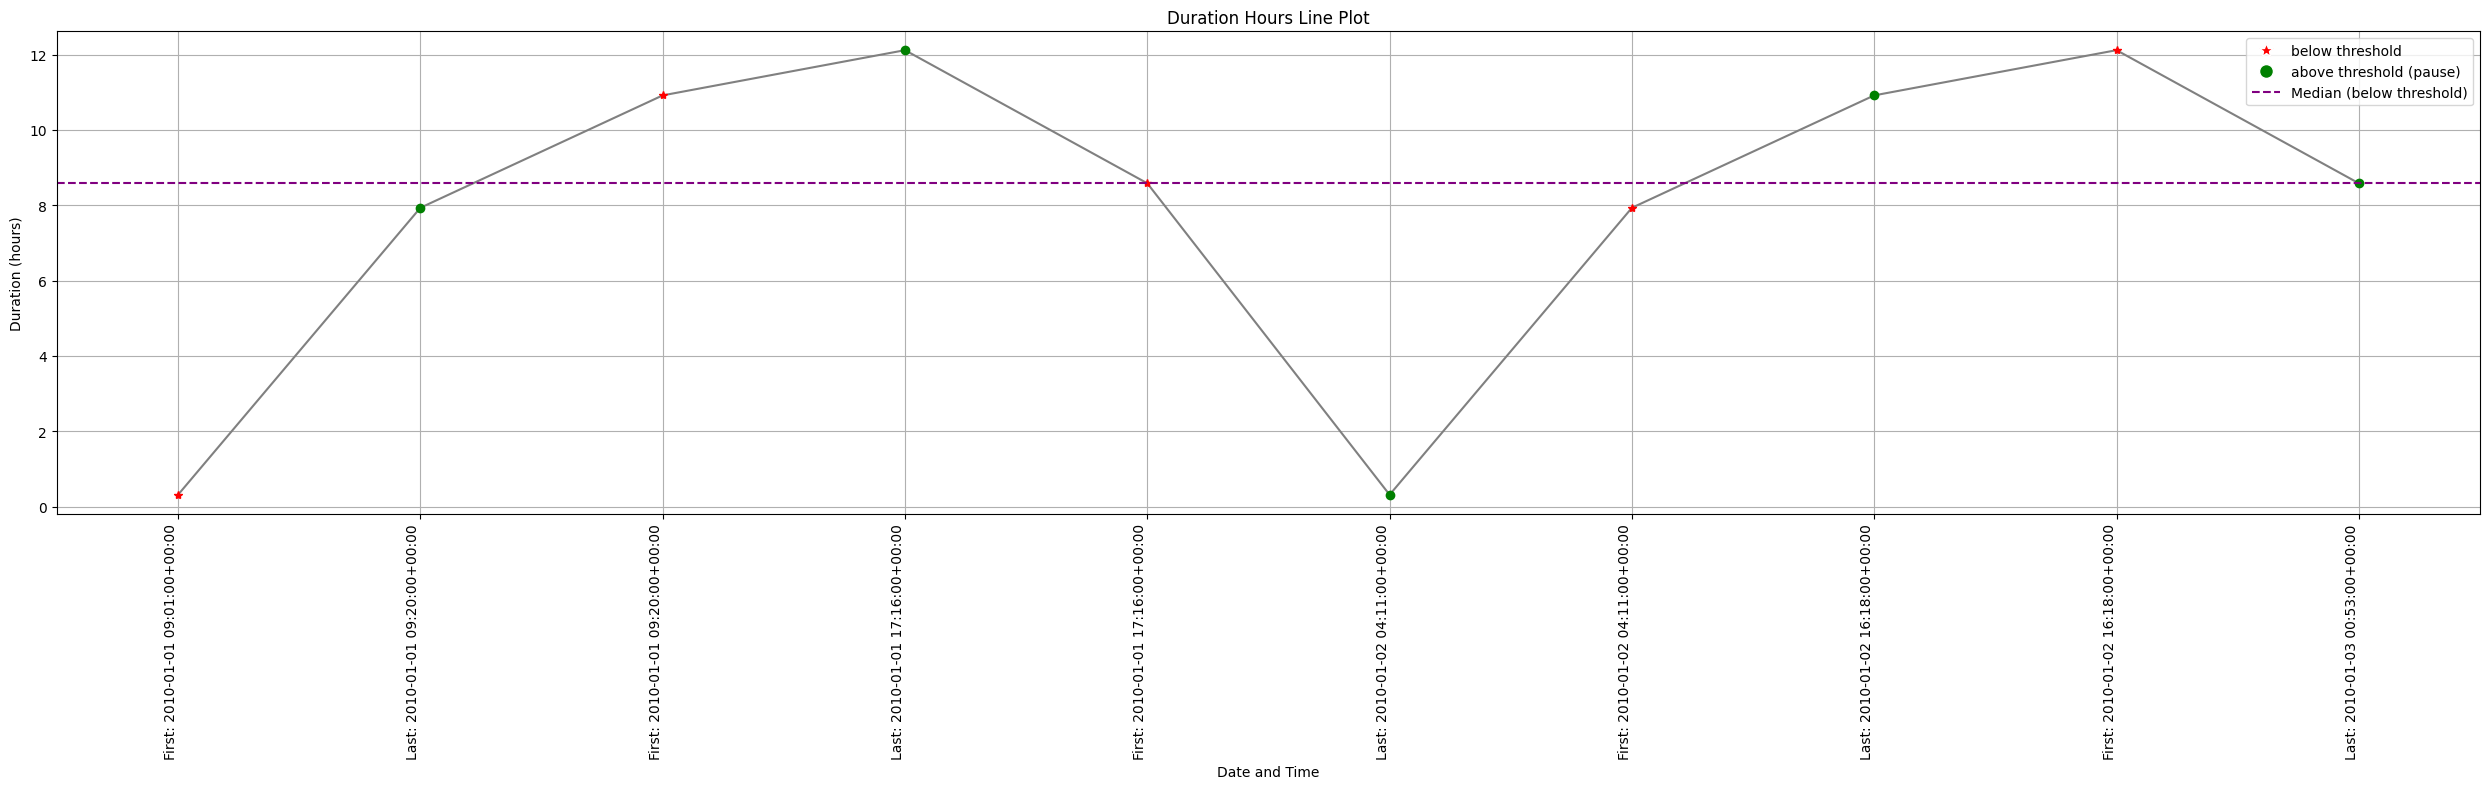

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np  # for np.median()

def plot_duration_hours_lineplot_styled(up_down_time_stats_1_df, start_row=0, end_row=None):
    if end_row is None:
        end_row = len(up_down_time_stats_1_df)

    duration_hours_first = []  # To store duration_hours for 'first'
    duration_hours_last = []   # To store duration_hours for 'last'
    x_labels = []              # To store formatted date and time labels
    markers = []               # To store markers for 'first' and 'last'

    for index, row in up_down_time_stats_1_df.iloc[start_row:end_row].iterrows():
        first = row['first']
        last = row['last']
        duration_first = row['duration_hours']
        duration_last = row['duration_hours']

        # Append the duration and labels for 'first' and 'last'
        duration_hours_first.append(duration_first)
        duration_hours_last.append(duration_last)
        x_labels.extend([f'First: {first}', f'Last: {last}'])
        markers.extend(['*', 'o'])

    combined_durations = duration_hours_first + duration_hours_last

    # Extract all 'below threshold' values using combined_durations and markers
    below_threshold_durations = [dur for dur, mark in zip(combined_durations, markers) if mark == '*']

    # Calculate median of all 'below threshold' values
    median_below_threshold = np.median(below_threshold_durations)

    fig, ax = plt.subplots(figsize=(25, 8))

    # Convert x_labels into a series of numeric indices
    x_indices = range(len(duration_hours_first + duration_hours_last))

    # Plot the durations with a connecting line
    ax.plot(x_indices, combined_durations, color='grey', linestyle='-', label='Connecting Line')

    # Plot markers on top of the connecting line
    for i, (duration, marker) in enumerate(zip(combined_durations, markers)):
        color = 'red' if marker == '*' else 'green'
        ax.plot(i, duration, marker=marker, markersize=6, color=color)

    # Replace numeric indices with the original x-labels
    ax.set_xticks(x_indices)
    ax.set_xticklabels(x_labels, rotation=90, ha='right')

    # Adding labels and title
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Duration (hours)')
    ax.set_title('Duration Hours Line Plot')

    # Plot the constant median line
    ax.axhline(median_below_threshold, color='purple', linestyle='--', label=f'Median (below threshold): {median_below_threshold:.2f}')

    # Create custom legend
    legend_elements = [
        Line2D([], [], marker='*', color='w', markerfacecolor='red', markersize=10, label='below threshold'),
        Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='above threshold (pause)'),
        Line2D([], [], color='purple', linestyle='--', label=f'Median (below threshold)')
    ]
    ax.legend(handles=legend_elements)

    # Adjust the space to fill most of the figure area
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)
    ax.set_xlim(min(x_indices) - 0.5, max(x_indices) + 0.5)
    ax.set_ylim(min(combined_durations) - 0.5, max(combined_durations) + 0.5)

    plt.grid(True)  # Add grid lines
    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
plot_duration_hours_lineplot_styled(up_down_time_stats_without_shutdown, start_row=0, end_row=5)


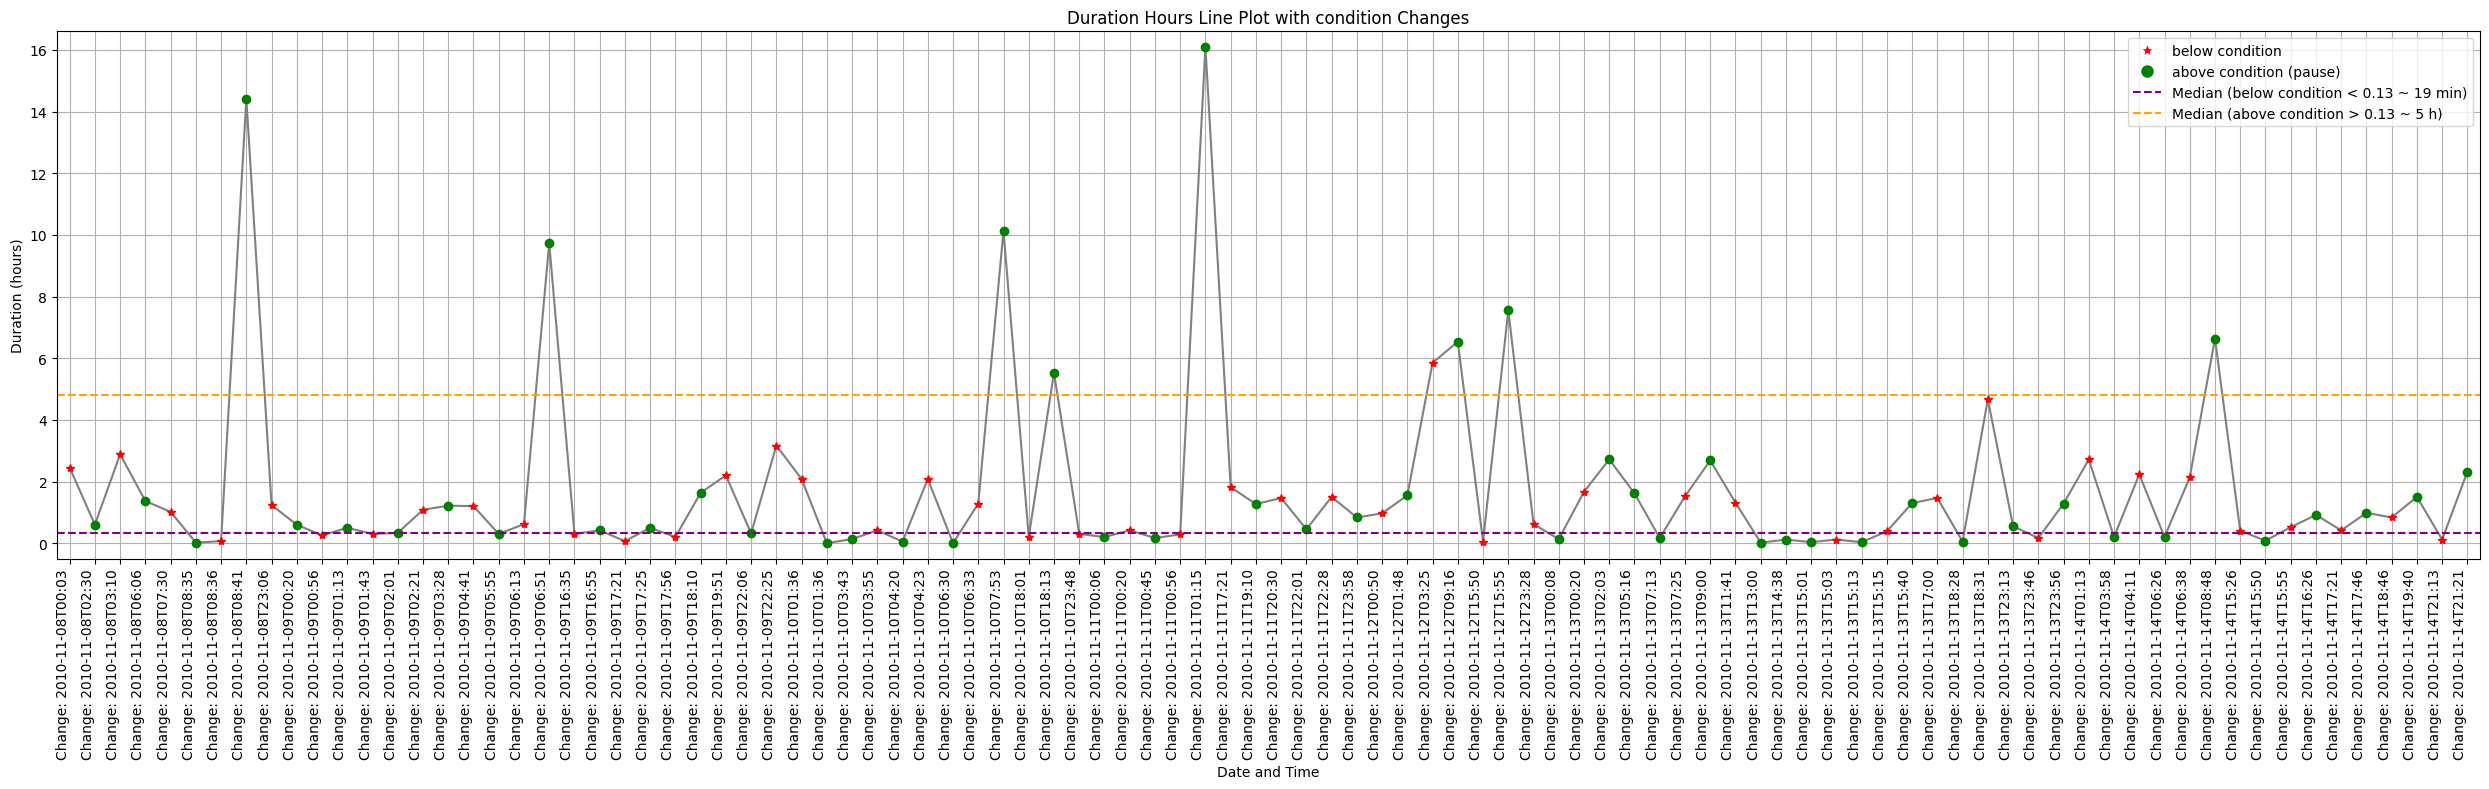

In [ ]:

#from google.colab import output
#output.enable_custom_widget_manager()
%matplotlib inline

def plot_duration_hours_lineplot_change_condition(up_down_time_stats_1_df, start_row=0, end_row=None):
    if end_row is None:
        end_row = len(up_down_time_stats_1_df)

    # Detecting the indices where condition changes
    conditions = up_down_time_stats_1_df["condition"].tolist()
    condition_changes = [i for i in range(1, len(conditions)) if conditions[i] != conditions[i-1]]

    # Compute median of all 'below condition' durations in the entire dataframe
    median_below_condition = np.median(up_down_time_stats_1_df[up_down_time_stats_1_df["condition"] == 1]['duration_hours'])
    median_above_condition = np.median(up_down_time_stats_1_df[up_down_time_stats_1_df["condition"] == 0]['duration_hours'])

    duration_hours = []  # To store duration_hours for 'first' or 'last' (depending on change)
    x_labels = []        # To store formatted date and time labels
    markers = []         # To store markers for 'first' and 'last'

    for i, (index, row) in enumerate(up_down_time_stats_1_df.iloc[start_row:end_row].iterrows()):
        if i in condition_changes or i == 0:
            datetime_value = pd.to_datetime(row['first'])
            duration_value = row['duration_hours']
            marker_value = '*' if row["condition"] == 1 else 'o'

            duration_hours.append(duration_value)
            x_labels.append(f'Change: {datetime_value.strftime("%Y-%m-%dT%H:%M")}')
            markers.append(marker_value)

    fig, ax = plt.subplots(figsize=(25, 8))

    x_indices = range(len(duration_hours))

    ax.plot(x_indices, duration_hours, color='grey', linestyle='-', label='Connecting Line')
    for i, (duration, marker) in enumerate(zip(duration_hours, markers)):
        color = 'red' if marker == '*' else 'green'
        ax.plot(i, duration, marker=marker, markersize=6, color=color)

    ax.set_xticks(x_indices)
    ax.set_xticklabels(x_labels, rotation=90, ha='right')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Duration (hours)')
    ax.set_title('Duration Hours Line Plot with condition Changes')

    ax.axhline(median_below_condition, color='purple', linestyle='--', label=f'Median (below condition): {median_below_condition:.2f}')
    ax.axhline(median_above_condition, color='orange', linestyle='--', label=f'Median (above condition): {median_above_condition:.2f}')

    legend_elements = [
        Line2D([], [], marker='*', color='w', markerfacecolor='red', markersize=10, label='below condition'),
        Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='above condition (pause)'),
        Line2D([], [], color='purple', linestyle='--', label=f'Median (below condition < 0.13 ~ 19 min)'),
        Line2D([], [], color='orange', linestyle='--', label=f'Median (above condition > 0.13 ~ 5 h)')
    ]
    ax.legend(handles=legend_elements)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)
    ax.set_xlim(min(x_indices) - 0.5, max(x_indices) + 0.5)
    ax.set_ylim(min(duration_hours) - 0.5, max(duration_hours) + 0.5)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the modified function
plot_duration_hours_lineplot_change_condition(up_down_time_stats_without_shutdown, start_row = 500, end_row = 600)
# siehe start_row = 500, end_row = 600


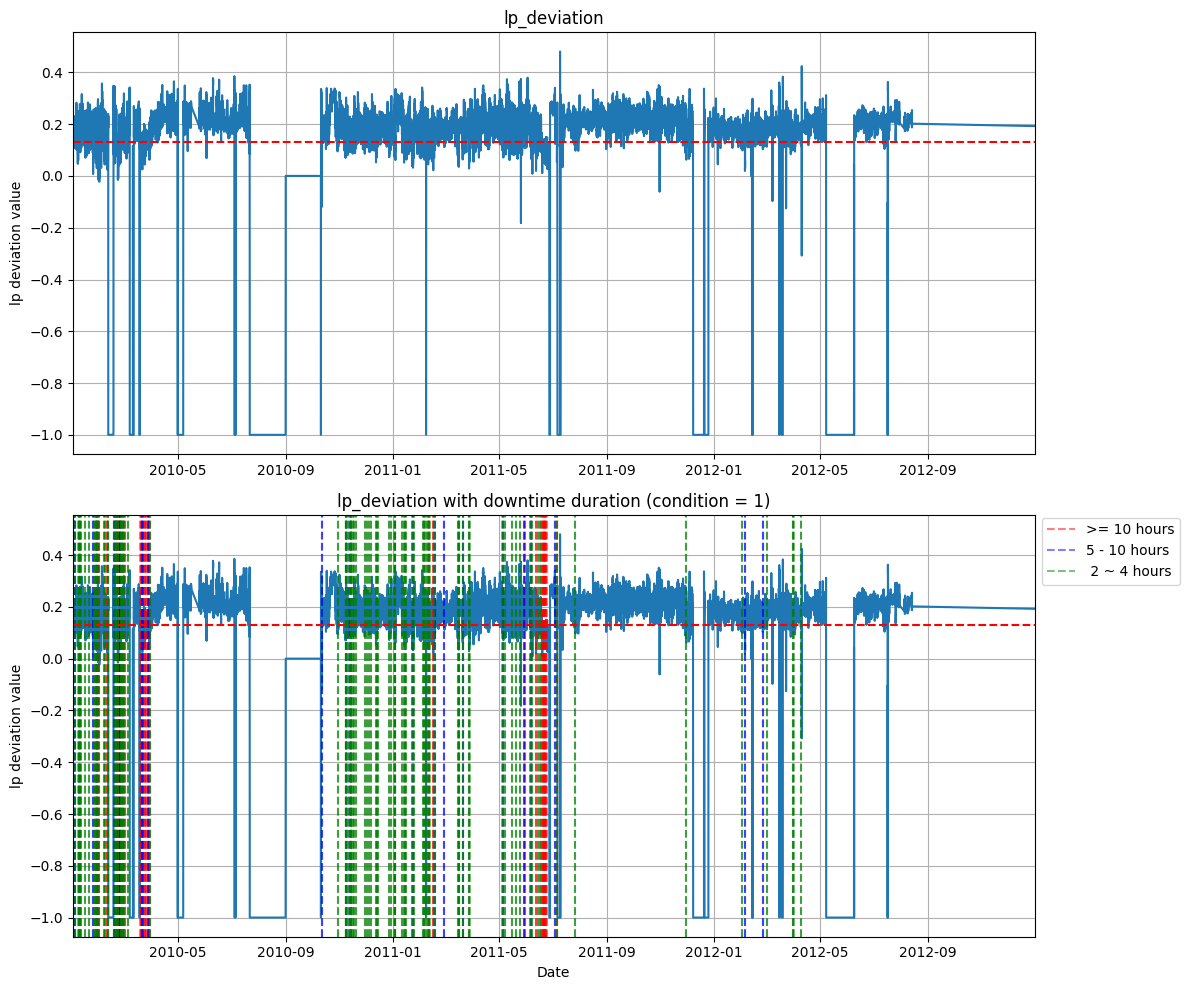

In [ ]:
from google.colab import output
import pandas as pd
import matplotlib.pyplot as plt

output.enable_custom_widget_manager()
#%matplotlib ipympl

# Your initial setup and data filtering
start_time = pd.Timestamp('2010-01-01 09:00:00+00:00')
end_time = pd.Timestamp('2012-12-31 00:00:00+00:00')

duration_35_plot = survival[(survival['date__time'] >= start_time) & (survival['date__time'] <= end_time)]

date_time = duration_35_plot["date__time"]
lp_dev_35 = duration_35_plot['lp_deviation']

# # Define the original highlight region
# highlight_start = pd.Timestamp('2010-04-09 00:00:00+00:00')
# highlight_end = pd.Timestamp('2010-04-30 00:00:00+00:00')

# # Define the new highlight region
# new_highlight_start = pd.Timestamp('2010-01-01 09:01:00+00:00')
# new_highlight_end = pd.Timestamp('2010-02-10 15:08:00+00:00')

# highlight_start_1 = pd.Timestamp('2010-10-10 18:48:00+00:00')
# highlight_end_1 = pd.Timestamp('2011-02-07 07:30:00+00:00')

# highlight_start_2 = pd.Timestamp('2011-07-10 10:02:00+00:00')
# highlight_end_2 = pd.Timestamp('2011-12-08 06:29:00+00:00')

# highlight_start_3 = pd.Timestamp('2010-05-06 22:20:00+00:00')
# highlight_end_3 = pd.Timestamp('2010-07-04 12:16:00+00:00')

# highlight_start_4 = pd.Timestamp('2010-07-05 14:35:00+00:00')
# highlight_end_4 = pd.Timestamp('2010-07-20 09:28:00+00:00')

# highlight_start_5 = pd.Timestamp('2011-12-25 18:05:00+00:00')
# highlight_end_5 = pd.Timestamp('2012-02-13 08:55:00+00:00')

# highlight_start_6 = pd.Timestamp('2012-07-17 01:51:00+00:00')
# highlight_end_6 = pd.Timestamp('2012-08-13 12:25:00+00:00')


# Creating the figure
fig = plt.figure(figsize=(12, 10))

# First subplot (new plot above without vertical lines)
plt.subplot(2, 1, 1)
plt.plot(date_time, lp_dev_35)
# plt.axvspan(highlight_start, highlight_end, facecolor='lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(new_highlight_start, new_highlight_end, facecolor='lightblue', edgecolor='none', alpha=0.5)  # New highlight
# plt.axvspan(highlight_start_1, highlight_end_1, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_2, highlight_end_2, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_3, highlight_end_3, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_4, highlight_end_4, facecolor = 'lightblue', edgecolor='none', alpha=0.5)

# plt.axvspan(highlight_start_5, highlight_end_5, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_6, highlight_end_6, facecolor = 'lightblue', edgecolor='none', alpha=0.5)



plt.title("lp_deviation")
plt.ylabel("lp deviation value")
plt.grid(True)
plt.xlim(start_time, end_time)
plt.axhline(y=0.13, color='r', linestyle='--')

# Second subplot (existing plot with vertical lines)
plt.subplot(2, 1, 2)
plt.plot(date_time, lp_dev_35)

used_labels = set()

# Plot vertical lines based on the top_downtimes dataframe
for index, row in top_downtimes.iterrows():
    duration_hours = (row['last'] - row['first']).total_seconds() / 3600

    if duration_hours >= 10:
        color = 'red'
        label = '>= 10 hours'
    elif duration_hours >= 5 and duration_hours < 10:
        color = 'blue'
        label = '5 - 10 hours'
    else:
        color = 'green'
        label = ' 2 ~ 4 hours'

    if label not in used_labels:
        plt.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5, label=label)
    else:
        plt.axvline(x = row['first'], color=color, linestyle = '--', alpha = 0.5)
    plt.axvline(x = row['last'], color = color, linestyle = '--', alpha = 0.5)
    used_labels.add(label)

# Highlighting the regions
# plt.axvspan(highlight_start, highlight_end, facecolor = 'lightblue', edgecolor = 'none', alpha = 0.5)
# plt.axvspan(new_highlight_start, new_highlight_end, facecolor='lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_1, highlight_end_1, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_2, highlight_end_2, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_3, highlight_end_3, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_4, highlight_end_4, facecolor = 'lightblue', edgecolor='none', alpha=0.5)

# plt.axvspan(highlight_start_5, highlight_end_5, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
# plt.axvspan(highlight_start_6, highlight_end_6, facecolor = 'lightblue', edgecolor='none', alpha=0.5)
plt.axhline(y = 0.13, color = 'r', linestyle = '--')

# Additional plot customizations
plt.title("lp_deviation with downtime duration (condition = 1)")
plt.xlabel("Date")
plt.ylabel("lp deviation value")
plt.grid(True)
plt.xlim(start_time, end_time)
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1.01))

# Display
plt.tight_layout()
plt.show()


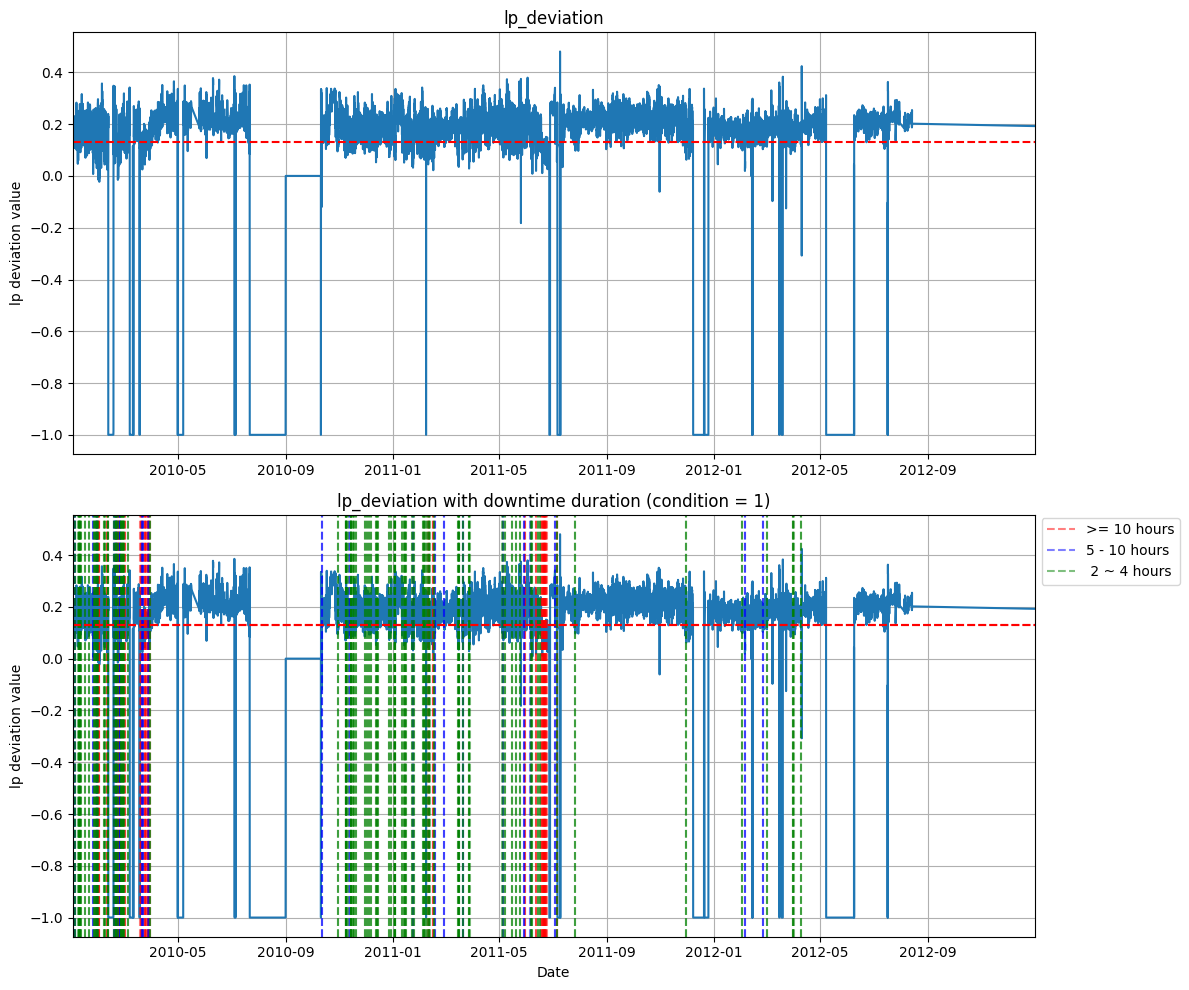

In [ ]:
from google.colab import output
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates


output.enable_custom_widget_manager()
#%matplotlib ipympl

# Your initial setup and data filtering
start_time = pd.Timestamp('2010-01-01 09:00:00+00:00')
end_time = pd.Timestamp('2012-12-31 00:00:00+00:00')

duration_35_plot = survival[(survival['date__time'] >= start_time) & (survival['date__time'] <= end_time)]

date_time = duration_35_plot["date__time"]
lp_dev_35 = duration_35_plot['lp_deviation']

# Creating the figure
fig = plt.figure(figsize=(12, 10))

# First subplot (new plot above without vertical lines)
ax1 = plt.subplot(2, 1, 1)
ax1.plot(date_time, lp_dev_35)

ax1.set_title("lp_deviation")
ax1.set_ylabel("lp deviation value")
ax1.grid(True)
ax1.set_xlim(start_time, end_time)
ax1.axhline(y=0.13, color='r', linestyle='--')

# Second subplot (existing plot with vertical lines)
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
ax2.plot(date_time, lp_dev_35)

used_labels = set()

# Plot vertical lines based on the top_downtimes dataframe
for index, row in top_downtimes.iterrows():
    duration_hours = (row['last'] - row['first']).total_seconds() / 3600

    if duration_hours >= 10:
        color = 'red'
        label = '>= 10 hours'
    elif duration_hours >= 5 and duration_hours < 10:
        color = 'blue'
        label = '5 - 10 hours'
    else:
        color = 'green'
        label = ' 2 ~ 4 hours'

    if label not in used_labels:
        ax2.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5, label=label)
    else:
        ax2.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5)
    ax2.axvline(x=row['last'], color=color, linestyle='--', alpha=0.5)
    used_labels.add(label)

ax2.axhline(y = 0.13, color = 'r', linestyle = '--')

plt.axhline(y = 0.13, color = 'r', linestyle = '--')

# Additional plot customizations
ax2.set_title("lp_deviation with downtime duration (condition = 1)")
ax2.set_xlabel("Date")
ax2.set_ylabel("lp deviation value")
ax2.grid(True)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1.01))

# Hover functionality
annot = ax2.annotate("", xy = (0,0), xytext = (10,-10),
                     textcoords="offset points",
                     bbox=dict(boxstyle = "round", fc = "w"),
                     arrowprops = dict(arrowstyle = "->"))
annot.set_visible(False)

def hover(event):
    if event.inaxes == ax2:
        x = event.xdata
        y = event.ydata
        annot.xy = (x, ax2.get_ylim()[0])
        date_time = mdates.num2date(x)  # Convert matplotlib's internal date format to a datetime object
        text = date_time.strftime('%Y-%m-%d %H:%M:%S')
        annot.set_text(text)
        annot.set_visible(True)
        fig.canvas.draw_idle()
    else:
        if annot.get_visible():
            annot.set_visible(False)
            fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

# Display
plt.tight_layout()
plt.show()


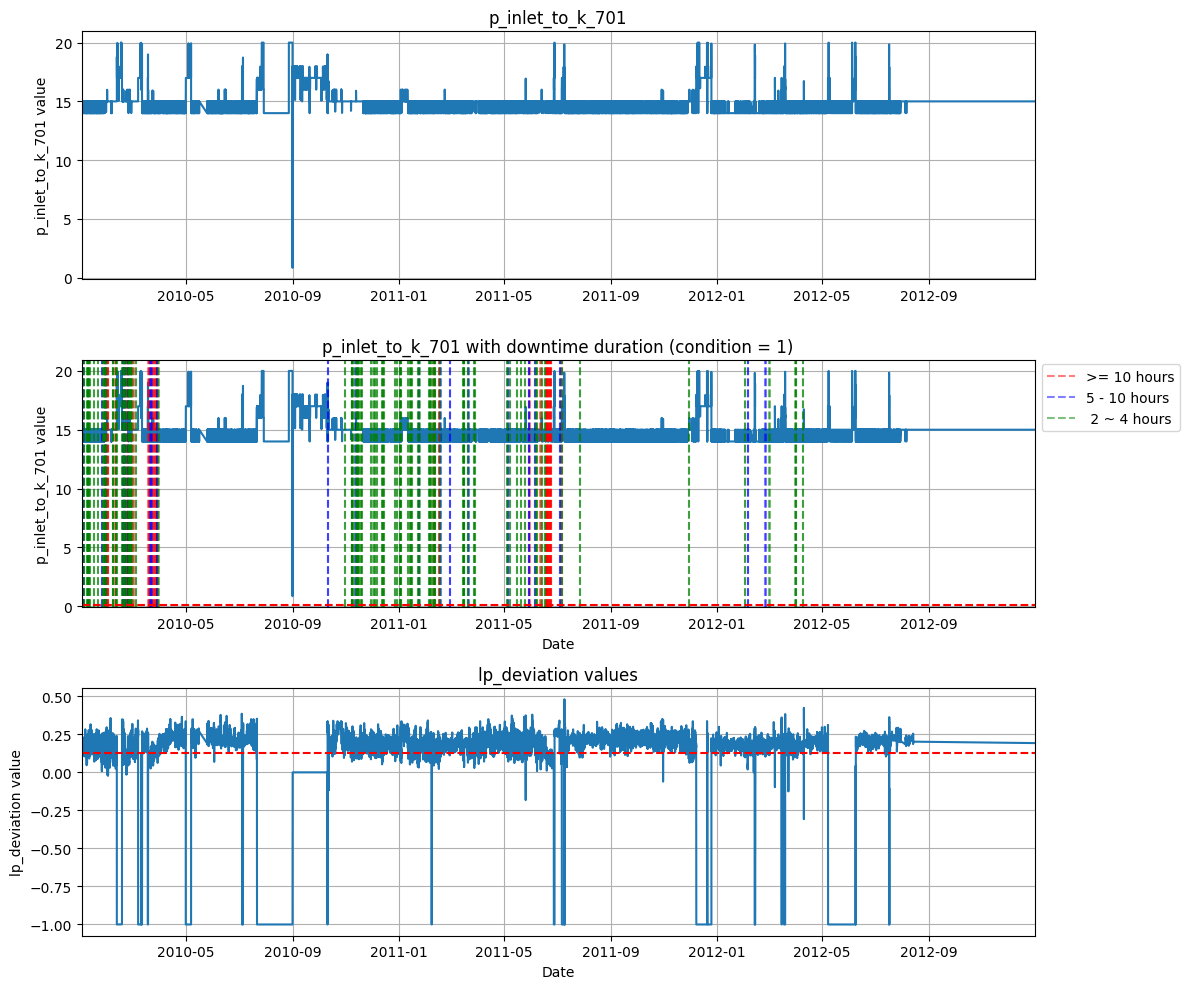

In [ ]:
from google.colab import output
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates


output.enable_custom_widget_manager()
#%matplotlib ipympl

# Your initial setup and data filtering
start_time = pd.Timestamp('2010-01-01 09:00:00+00:00')
end_time = pd.Timestamp('2012-12-31 00:00:00+00:00')

duration_35_plot = survival[(survival['date__time'] >= start_time) & (survival['date__time'] <= end_time)]

date_time = duration_35_plot["date__time"]
lp_dev_35 = duration_35_plot['p_inlet_to_k_701']

# Creating the figure
fig = plt.figure(figsize=(12, 10))

# First subplot (new plot above without vertical lines)
ax1 = plt.subplot(3, 1, 1)  # Change to 3, 1, 1
ax1.plot(date_time, lp_dev_35)

ax1.set_title("p_inlet_to_k_701")
ax1.set_ylabel("p_inlet_to_k_701 value")
ax1.grid(True)
ax1.set_xlim(start_time, end_time)
# ax1.axhline(y=0.13, color='r', linestyle='--')

# Second subplot (existing plot with vertical lines)
ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax2.plot(date_time, lp_dev_35)

used_labels = set()

# Plot vertical lines based on the top_downtimes dataframe
for index, row in top_downtimes.iterrows():
    duration_hours = (row['last'] - row['first']).total_seconds() / 3600

    if duration_hours >= 10:
        color = 'red'
        label = '>= 10 hours'
    elif duration_hours >= 5 and duration_hours < 10:
        color = 'blue'
        label = '5 - 10 hours'
    else:
        color = 'green'
        label = ' 2 ~ 4 hours'

    if label not in used_labels:
        ax2.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5, label=label)
    else:
        ax2.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5)
    ax2.axvline(x=row['last'], color=color, linestyle='--', alpha=0.5)
    used_labels.add(label)

ax2.axhline(y = 0.13, color = 'r', linestyle = '--')

# plt.axhline(y = 0.13, color = 'r', linestyle = '--')

# Additional plot customizations
ax2.set_title("p_inlet_to_k_701 with downtime duration (condition = 1)")
ax2.set_xlabel("Date")
ax2.set_ylabel("p_inlet_to_k_701 value")
ax2.grid(True)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1.01))

# Hover functionality
annot = ax2.annotate("", xy = (0,0), xytext = (10,-10),
                     textcoords="offset points",
                     bbox=dict(boxstyle = "round", fc = "w"),
                     arrowprops = dict(arrowstyle = "->"))
annot.set_visible(False)

def hover(event):
    if event.inaxes == ax2:
        x = event.xdata
        y = event.ydata
        annot.xy = (x, ax2.get_ylim()[0])
        date_time = mdates.num2date(x)  # Convert matplotlib's internal date format to a datetime object
        text = date_time.strftime('%Y-%m-%d %H:%M:%S')
        annot.set_text(text)
        annot.set_visible(True)
        fig.canvas.draw_idle()
    else:
        if annot.get_visible():
            annot.set_visible(False)
            fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

lp_deviation = duration_35_plot['lp_deviation']  # Assuming 'lp_deviation' is the column name in your DataFrame
ax3 = plt.subplot(3, 1, 3, sharex=ax1)  # New subplot for lp_deviation
ax3.plot(date_time, lp_deviation)
ax3.set_title("lp_deviation values")
ax3.set_xlabel("Date")
ax3.set_ylabel("lp_deviation value")
ax3.axhline(y = 0.13, color = 'r', linestyle = '--')
ax3.grid(True)


# Display
plt.tight_layout()
plt.show()


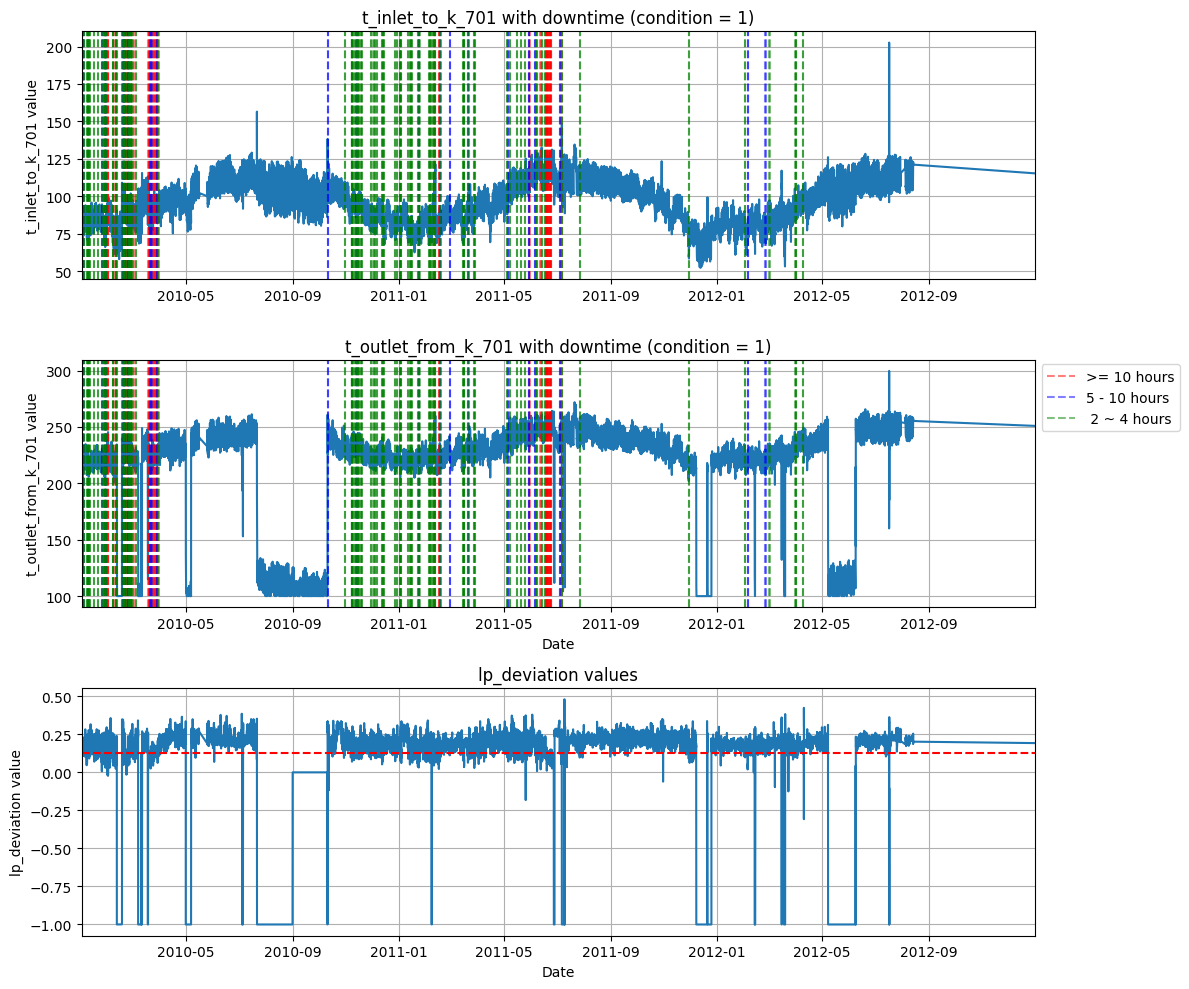

In [ ]:
# wenig correlatin mit lp_deviation t_inlet_to_k_701 und t_outlet_from_k_701
from google.colab import output
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates


output.enable_custom_widget_manager()
#%matplotlib ipympl

# Your initial setup and data filtering
start_time = pd.Timestamp('2010-01-01 09:00:00+00:00')
end_time = pd.Timestamp('2012-12-31 00:00:00+00:00')

duration_35_plot = survival[(survival['date__time'] >= start_time) & (survival['date__time'] <= end_time)]

date_time = duration_35_plot["date__time"]
lp_dev_35 = duration_35_plot['t_inlet_to_k_701']

# Creating the figure
fig = plt.figure(figsize=(12, 10))

# First subplot (new plot above without vertical lines)
ax1 = plt.subplot(3, 1, 1)  # Change to 3, 1, 1
ax1.plot(date_time, lp_dev_35)

ax1.set_title("t_inlet_to_k_701 with downtime (condition = 1)")
ax1.set_ylabel("t_inlet_to_k_701 value")
ax1.grid(True)
ax1.set_xlim(start_time, end_time)
# Plot vertical lines based on the top_downtimes dataframe

used_labels = set()

for index, row in top_downtimes.iterrows():
    duration_hours = (row['last'] - row['first']).total_seconds() / 3600

    if duration_hours >= 10:
        color = 'red'
        label = '>= 10 hours'
    elif duration_hours >= 5 and duration_hours < 10:
        color = 'blue'
        label = '5 - 10 hours'
    else:
        color = 'green'
        label = ' 2 ~ 4 hours'

    if label not in used_labels:
        ax1.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5, label=label)
    else:
        ax1.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5)
    ax1.axvline(x=row['last'], color=color, linestyle='--', alpha=0.5)
    used_labels.add(label)


# Second subplot (existing plot with vertical lines)

date_time = duration_35_plot["date__time"]
lp_dev_35 = duration_35_plot['t_outlet_from_k_701']

ax2 = plt.subplot(3, 1, 2, sharex=ax1)  # Change to 3, 1, 2
ax2.plot(date_time, lp_dev_35)

used_labels = set()

# Plot vertical lines based on the top_downtimes dataframe
for index, row in top_downtimes.iterrows():
    duration_hours = (row['last'] - row['first']).total_seconds() / 3600

    if duration_hours >= 10:
        color = 'red'
        label = '>= 10 hours'
    elif duration_hours >= 5 and duration_hours < 10:
        color = 'blue'
        label = '5 - 10 hours'
    else:
        color = 'green'
        label = ' 2 ~ 4 hours'

    if label not in used_labels:
        ax2.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5, label=label)
    else:
        ax2.axvline(x=row['first'], color=color, linestyle='--', alpha=0.5)
    ax2.axvline(x=row['last'], color=color, linestyle='--', alpha=0.5)
    used_labels.add(label)


# plt.axhline(y = 0.13, color = 'r', linestyle = '--')

# Additional plot customizations
ax2.set_title("t_outlet_from_k_701 with downtime (condition = 1)")
ax2.set_xlabel("Date")
ax2.set_ylabel("t_outlet_from_k_701 value")
ax2.grid(True)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1.01))


# Hover functionality
annot = ax2.annotate("", xy = (0,0), xytext = (10,-10),
                     textcoords="offset points",
                     bbox=dict(boxstyle = "round", fc = "w"),
                     arrowprops = dict(arrowstyle = "->"))
annot.set_visible(False)

def hover(event):
    if event.inaxes == ax2:
        x = event.xdata
        y = event.ydata
        annot.xy = (x, ax2.get_ylim()[0])
        date_time = mdates.num2date(x)  # Convert matplotlib's internal date format to a datetime object
        text = date_time.strftime('%Y-%m-%d %H:%M:%S')
        annot.set_text(text)
        annot.set_visible(True)
        fig.canvas.draw_idle()
    else:
        if annot.get_visible():
            annot.set_visible(False)
            fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

lp_deviation = duration_35_plot['lp_deviation']  # Assuming 'lp_deviation' is the column name in your DataFrame
ax3 = plt.subplot(3, 1, 3, sharex=ax1)  # New subplot for lp_deviation
ax3.plot(date_time, lp_deviation)
ax3.set_title("lp_deviation values")
ax3.set_xlabel("Date")
ax3.set_ylabel("lp_deviation value")
ax3.axhline(y = 0.13, color = 'r', linestyle = '--')
ax3.grid(True)

# Display
plt.tight_layout()
plt.show()
